<h1> Integrations: N16-BodyProblem (efficiency)</h1>

<ul id="top">
  <li><a href="#Initializations">Initializations</a></li>
  <li><a href="#Problem-Parameters">Problem-Parameters</a></li>
  <li><a href="#Initial-Value-Problem">Initial-Value-Problem </a></li>
  <li><a href="#Numerical-Integrations-Threads1">Numerical-Integrations-Threads1</a></li>
      <ul>
        <li><a href="#Executions-Theads1">Executions-Theads1</a></li>
        <li><a href="#Data-Threads1">Data-Threads1</a></li>
        <li><a href="#Graphics-Threads1">Graphics-Threads1</a></li>
      </ul>
  <li><a href="#Numerical-Integrations-Threads4">Numerical-Integrations-Threads4</a></li>
      <ul>
        <li><a href="#Executions-Theads4">Executions-Theads4</a></li>
        <li><a href="#Data-Threads4">Data-Threads4</a></li>
        <li><a href="#Graphics-Threads4">Graphics-Threads4</a></li>
      </ul>  
</ul>  

<h2 id="Initializations">Initializations</h2>

In [1]:
using NBInclude
using Plots
using Dates
using DelimitedFiles;

In [2]:
MYPATH="../../../Code/Julia/"
@nbinclude(string(MYPATH,"NBodyProblem.ipynb"))
@nbinclude(string(MYPATH,"C-Interfaces.ipynb"))
@nbinclude(string(MYPATH,"AuxiliarFunctions.ipynb"));

In [3]:
#Filenames
#Output
# Integrations solutions
sol="./Data/Out.bin"

# Eficiency statistics (Threads=1)
StatcsT11="./Data/StacsT11.txt"
StatcsT12="./Data/StacsT12.txt"
StatcsT13="./Data/StacsT13.txt";
StatcsT14="./Data/StacsT14.txt";
# Eficiency statistics (Threads=4)
StatcsT44="./Data/StacsT44.txt";

In [4]:
#Plot parameters
# Title
MyTitle="N16-Body Problem"
# Energy plots
Eaxa=-26
Eaxb=-10
# Position and velocity plots
axisya=-26
axisyb=-12;

<a href="#top">Back to the top</a>

<h2 id"Initial-Value-Problem">Initial-Value-Problem</h2>

In [5]:
(nbody,u0,k,Gm,iE,iM)= N16_Initial_Values()
(nbody, length(u0),length(Gm),iE,iM)

In [6]:
U0=ChangeBartoHel(u0,Gm)
neqH=length(U0)
nbodyH=nbody-1;

<a href="#top">Back to the top</a>

<h2 id="Integration-Parameters">Integration-Parameters</h2>

In [8]:
t0=0.
tend=1000000.
#tend=1000.;    # portatilean probatzeko egokia
tspan=(t0,tend);
nout=10;

In [9]:
nk=22*4;
j=1/4;
hh0=zeros(Float64,nk)
for i in 1:nk
     hh0[i]=j*2^(i/16)
end

hhsABA=1/4. *hh0
hhs8=8/6. *hh0

#ABAH: denak
#FCIRK:
i0=4*8
i1=nk-4*4;
i1=nk
(i0,i1)

(32, 88)

In [10]:
#Integration parameters
n0=round.((tend-t0)./hh0);
ns8=round.((tend-t0)./hhs8);
nsABA=round.((tend-t0)./hhsABA);

hhh0=(tend-t0)./n0;
hhhs8=(tend-t0)./ns8;
hhhsABA=(tend-t0)./nsABA;

#nout=1;
saveat0=Integer.(round.((tend-t0)./(nout*hh0)));   
saveats8=Integer.(round.((tend-t0)./(nout*hhs8)));
saveatsABA=Integer.(round.((tend-t0)./(nout*hhsABA)));

#
h0=(tend-t0)./(nout*saveat0);
hs8=(tend-t0)./(nout*saveats8);
hsABA=(tend-t0)./(nout*saveatsABA);
#
nstep0=(tend-t0)./h0;
nsteps8=(tend-t0)./hs8;
nstepsABA=(tend-t0)./hsABA;
#
nout0=nstep0./saveat0;
nouts8=nsteps8./saveats8;
noutsABA=nstepsABA./saveatsABA;

In [11]:
[h0,[tend],nstep0,nout0,saveat0]

5-element Array{Array{Float64,1},1}:
 [0.26106865844648486, 0.2726266487096581, 0.2846975088967972, 0.29730139523544785, 0.3104645170103509, 0.3242100621834899, 0.3385641494422156, 0.3535530311869129, 0.36920668559466274, 0.3855525739489837  …  7.661074082586379, 8.0, 8.35421888053467, 8.723719794120212, 9.109957183201239, 9.513842641042718, 9.934432743890325, 10.374520178441747, 10.834236186348862, 11.313497001923295]
 [1.0e6]
 [3.8304099999999995e6, 3.66802e6, 3.5124999999999995e6, 3.36359e6, 3.22098e6, 3.08442e6, 2.95365e6, 2.82843e6, 2.70851e6, 2.59368e6  …  130530.0, 125000.0, 119700.0, 114630.00000000001, 109770.0, 105109.99999999999, 100659.99999999999, 96390.0, 92300.0, 88390.0]
 [9.999999999999998, 10.0, 9.999999999999998, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0  …  10.0, 10.0, 10.0, 10.000000000000002, 10.0, 9.999999999999998, 9.999999999999998, 10.0, 10.0, 10.0]
 [383041.0, 366802.0, 351250.0, 336359.0, 322098.0, 308442.0, 295365.0, 282843.0, 270851.0, 259368.0  …  13053.0,

<a href="#top">Back to the top</a>

<h2 id="Numerical-Integrations-Threads1">Numerical-Integrations-Threads1</h2>

<h3 id="Executions-Theads1">Executions-Theads1</h3>

In [12]:
now()

2020-12-28T21:32:31.512

In [13]:
threads=1
results1=zeros(nk,10)
results2=zeros(nk,10)
results3=zeros(nk,10)
results4=zeros(nk,10)


print("ABAH1064:")
ode=2
prob=ODEProblem2(ode,tspan,U0,k,Gm)

for i in 1:nk
    
    print(i,",")
    
   
    # ABAH1064 
    codmethod=10649
    destats=solve(sol,prob,longComp,codmethod,h0[i],saveat=saveat0[i],mixed=false)    
    results1[i,:]=destats

    
     #ABAH1064 (Mixed-precision)
     codmethod=10649
#    destats=solve(sol,prob,longComp,codmethod,algorithm,hsABA[i],saveat=saveatsABA[i],mixed=true)
#    results2[i,:]=destats
    
    

end

print("FCIRK:")
ode=2 
prob=ODEProblem(ode,tspan,U0,k,Gm)

for i in i0:i1
    
    print(i,",")
    
    #FCIRK-L  Method (ns=8)     
    destats=solve(sol,prob,longFCIRK,hs8[i],saveat=saveats8[i],adaptive=true,mixed=false)
    results3[i,:]=destats
    
    
    #FCIRK-LQ  Method (ns=8)     
    destats=solve(sol,prob,longFCIRK,hs8[i],saveat=saveats8[i],adaptive=true,mixed=true)
    results4[i,:]=destats
    
end
print("end")

ABAH1064:1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,FCIRK:32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,end

In [14]:
now()

2020-12-29T08:01:49.957

<h3 id="Data-Threads1">Data-Threads1</h3>

In [15]:
f1=open(StatcsT11,"w")
f2=open(StatcsT12,"w")
f3=open(StatcsT13,"w")
f4=open(StatcsT14,"w")
writedlm(f1,results1)
writedlm(f2,results2)
writedlm(f3,results3)
writedlm(f4,results4)
close(f1)
close(f2)
close(f3)
close(f4)

In [16]:
nsuccess1,nsteps1,nfcn1,MaxDE1,CTime1,WTime1=Assing_results(nk,results1)    
nsuccess2,nsteps2,nfcn2,MaxDE2,CTime2,WTime2=Assing_results(nk,results2)    
nsuccess3,nsteps3,nfcn3,MaxDE3,CTime3,WTime3=Assing_results(nk,results3)    
nsuccess4,nsteps4,nfcn4,MaxDE4,CTime4,WTime4=Assing_results(nk,results4)
transpose([nsuccess1,nsuccess2,nsuccess4,nsuccess4])

1×4 Transpose{Float64,Array{Float64,1}}:
 88.0  88.0  88.0  88.0

<h3 id="Data-Threads1">Graphics-Threads1</h3>

<h4> Plot (DE/ Nfcn) </h4>

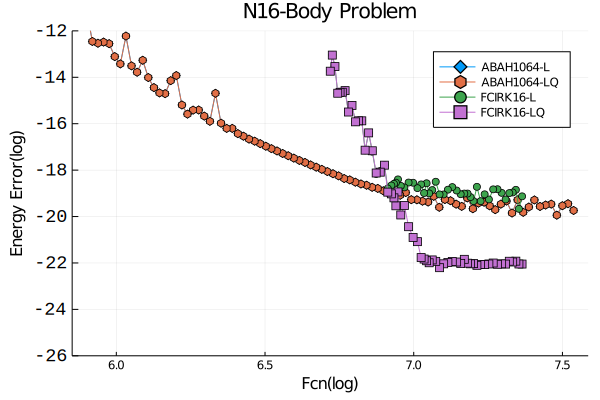

In [17]:
plot(nfcn1, MaxDE1,  marker = :diamond, label="ABAH1064-L")
plot!(nfcn2, MaxDE2, marker = :hexagon,label="ABAH1064-LQ")
plot!(nfcn3, MaxDE3, marker = :circle, label="FCIRK16-L")
plot!(nfcn4, MaxDE4, marker = :square, label="FCIRK16-LQ")
plot!(title=MyTitle,
      xlabel="Fcn(log)",
      ylabel="Energy Error(log)",
      ylims=(axisya,axisyb),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

In [18]:
#savefig("./Figures/Fig1a.pdf")

<h4> Plot (DE/ CPU Time) </h4>

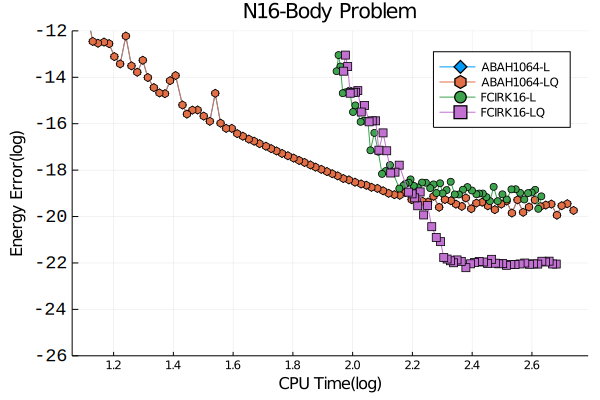

In [19]:
plot(CTime1, MaxDE1,  marker = :diamond,  label="ABAH1064-L")
plot!(CTime2, MaxDE2, marker = :hexagon, label="ABAH1064-LQ")
plot!(CTime3, MaxDE3, marker = :circle, label="FCIRK16-L")
plot!(CTime4, MaxDE4, marker = :square,label="FCIRK16-LQ")
plot!(title=MyTitle,
      xlabel="CPU Time(log)",
      ylabel="Energy Error(log)",
      ylims=(axisya,axisyb),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

In [20]:
#savefig("./Figures/Fig2.pdf")

<h4> Plot (DE/ WALL Time) </h4>

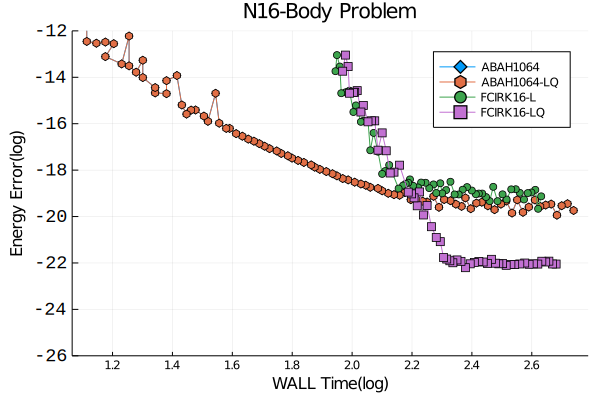

In [21]:
plot(WTime1, MaxDE1, marker = :diamond,  label="ABAH1064")
plot!(WTime2, MaxDE2, marker = :hexagon, label="ABAH1064-LQ")
plot!(WTime3, MaxDE3,  marker = :circle, label="FCIRK16-L")
plot!(WTime4, MaxDE4, marker = :square,label="FCIRK16-LQ")
plot!(title=MyTitle,
xlabel="WALL Time(log)",
      ylabel="Energy Error(log)",
      ylims=(axisya,axisyb),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

<a href="#top">Back to the top</a>

## Numerical-Integrations-Threads4

In [22]:
now()

2020-12-29T08:02:07.517

In [23]:
results4T4=zeros(nk,10)

print("FCIRK (MIXED):")
ode=2
prob=ODEProblem(ode,tspan,U0,k,Gm)

for i in i0:i1
    
    print(i,",");
    destats=solve(sol,prob,longFCIRK,hs8[i],saveat=saveats8[i],
                   adaptive=true,mixed=true,threads=4) 
    results4T4[i,:]=destats
    
end
print("end")

FCIRK:32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,end

In [24]:
now()

2020-12-29T10:05:05.618

### Data-Threads4

In [25]:
f4=open(StatcsT44,"w")
writedlm(f4,results4T4)
close(f4)

In [26]:
nsuccess4T4,nsteps4T4,nfcn4T4,MaxDE4T4,CTime4T4,WTime4T4=Assing_results(nk,results4T4);
nsuccess4T4

88.0

### Graphics-Threads4

#### Plot (DE/ WALL Time) 

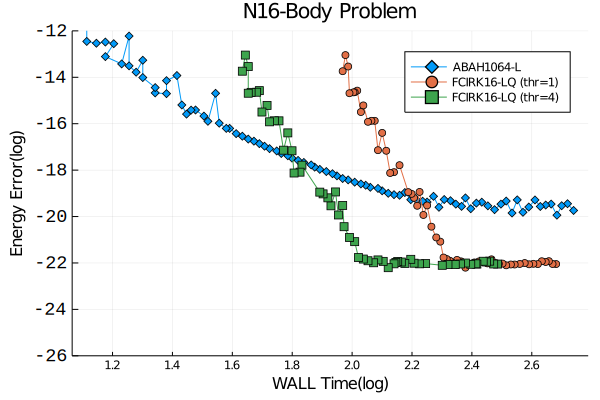

In [27]:
plot(WTime1, MaxDE1, marker = :diamond,   label="ABAH1064-L")
plot!(WTime4, MaxDE4,  marker = :circle, label="FCIRK16-LQ (thr=1)")
plot!(WTime4T4, MaxDE4T4, marker = :square, label="FCIRK16-LQ (thr=4)")
plot!(title=MyTitle,
xlabel="WALL Time(log)",
      ylabel="Energy Error(log)",
      ylims=(axisya,axisyb),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

In [28]:
#savefig("./Figures/Fig1b.pdf")

In [29]:
now()

2020-12-29T10:05:05.983